In [1]:
from google.colab import drive
from google.colab import files
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/OrbitFutureAcademy/jst_hujan.py /content

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from jst_hujan import *
import pandas as pd

In [4]:
# menciptakan objek dari kelas JST
jst = JST();

In [5]:
# inisialisasi parameter-parameter JST
n_input = 9
n_hidden = 18
n_output = 1
alpha = 0.95
toleransi_eror = 0.001
iterasi = 200

In [6]:
data = pd.read_excel('/content/drive/My Drive/OrbitFutureAcademy/Dataset/databersih.xlsx',header='infer')
data = data.to_numpy()
#data.head(10)

In [7]:
# mengakses data berdasarkan kolom/parameter
#date = data[:,0]
temp = data[:,1]
windspeed = data[:,2]
winddirDegree = data[:,3]
humidity = data[:,4]
pressure = data[:,5]
cloudcover = data[:,6]
DewPoint = data[:,7]
WindGust = data[:,8]
precipMM = data[:,9]


In [8]:
print("DewPoint :",DewPoint)
print("precipMM :",precipMM)
print("WindGust :",WindGust)

DewPoint : [22.0 23.0 23.0 ... 22.0 22.0 22.0]
precipMM : [9.7 6.8 15.0 ... 1.8 0.6 0.8]
WindGust : [16.0 13.0 11.0 ... 13.0 11.0 14.0]


In [9]:
# normalisasi data menggunakan fungsi Nrmalisasi kelas JST
temp = jst.Normalisasi(temp)
windspeed = jst.Normalisasi(windspeed)
winddirDegree = jst.Normalisasi(winddirDegree)
humidity = jst.Normalisasi(humidity)
pressure = jst.Normalisasi(pressure)
cloudcover = jst.Normalisasi(cloudcover)
DewPoint = jst.Normalisasi(DewPoint)
WindGust = jst.Normalisasi(WindGust)
precipMM = jst.Normalisasi(precipMM)

In [10]:
print("DewPointC :",DewPoint)
print("precipMM :",precipMM)

DewPointC : [[0.625]
 [0.75 ]
 [0.75 ]
 ...
 [0.625]
 [0.625]
 [0.625]]
precipMM : [[0.061]
 [0.043]
 [0.095]
 ...
 [0.011]
 [0.004]
 [0.005]]


In [11]:
# data ternormalisasi
data_normalisasi = np.concatenate((
    temp,windspeed,winddirDegree,humidity,pressure,cloudcover,DewPoint,WindGust,precipMM
    ),axis=1)

print("data ternormalisasi:",data_normalisasi)

data ternormalisasi: [[0.636 0.409 0.868 ... 0.625 0.406 0.061]
 [0.727 0.318 0.928 ... 0.75  0.312 0.043]
 [0.636 0.273 0.447 ... 0.75  0.25  0.095]
 ...
 [0.818 0.318 0.77  ... 0.625 0.312 0.011]
 [0.818 0.273 0.755 ... 0.625 0.25  0.004]
 [0.818 0.364 0.805 ... 0.625 0.344 0.005]]


In [12]:
# menentukan jumlah data latih dan data uji
n_datalatih = 3653
n_datauji = 365

In [13]:
# menentukan data latih
data_latih = data_normalisasi[0:n_datalatih,0:8]
target_output = data_normalisasi[0:n_datalatih,8]
print(data_latih)
print(target_output)



[[0.636 0.409 0.868 ... 0.365 0.625 0.406]
 [0.727 0.318 0.928 ... 0.427 0.75  0.312]
 [0.636 0.273 0.447 ... 0.458 0.75  0.25 ]
 ...
 [0.636 0.273 0.777 ... 0.708 0.75  0.281]
 [0.455 0.273 0.761 ... 0.74  0.875 0.406]
 [0.455 0.364 0.818 ... 0.812 0.75  0.375]]
[0.061 0.043 0.095 ... 0.038 0.34  0.132]


In [14]:
# membangkitkan bobot V dan bobot W secara acak
[V,W] = jst.AcakBobot(n_input,n_hidden,n_output)

print('========================================')
print('      PARAMETER JST BACKPROPAGATION     ')
print('========================================')
print('')
print('Neuron Input    : ',n_input)
print('Neuron Hidden   : ',n_hidden)
print('Neuron Output   : ',n_output)
print('Laju Pembelajaran (alpha) : ',alpha)
print('Toleransi eror  : ',toleransi_eror)
print('iterasi         : ',iterasi)
print('Data Latih                 : ')
print(data_latih)
print('')
print('Target Output              : ')
print(target_output)
print('')
print('Bobot V                    : ')
print(V)
print('')
print('Bobot W                    : ')
print(W)
print('')


      PARAMETER JST BACKPROPAGATION     

Neuron Input    :  9
Neuron Hidden   :  18
Neuron Output   :  1
Laju Pembelajaran (alpha) :  0.95
Toleransi eror  :  0.001
iterasi         :  200
Data Latih                 : 
[[0.636 0.409 0.868 ... 0.365 0.625 0.406]
 [0.727 0.318 0.928 ... 0.427 0.75  0.312]
 [0.636 0.273 0.447 ... 0.458 0.75  0.25 ]
 ...
 [0.636 0.273 0.777 ... 0.708 0.75  0.281]
 [0.455 0.273 0.761 ... 0.74  0.875 0.406]
 [0.455 0.364 0.818 ... 0.812 0.75  0.375]]

Target Output              : 
[0.061 0.043 0.095 ... 0.038 0.34  0.132]

Bobot V                    : 
[[0.1        0.1        0.1        0.1        0.1        0.1
  0.1        0.1        0.1        0.1        0.1        0.1
  0.1        0.1        0.1        0.1        0.1        0.1       ]
 [0.72350957 0.88109089 0.22888234 0.07629434 0.27925349 0.30969538
  0.25946143 0.50370859 0.25677846 0.10210053 0.79848192 0.16007426
  0.87816177 0.29841626 0.94433336 0.29047477 0.2485184  0.41411555]
 [0.89934242 0.381

In [15]:
print('========================================')
print('            PROSES PELATIHAN            ')
eror = np.zeros((n_datalatih,1))
mse = np.zeros((iterasi,1))
jumlah_iterasi = 0

for i in range(iterasi):
    print('iterasi ke-',(i+1))
    for j in range(n_datalatih):
        # pengkodean target keluaran
        #print("target output : ",t_output)
        [Z,Y] = jst.PerambatanMaju(data_latih[j,:],V,W,n_hidden,n_output)
        [W,V] = jst.PerambatanMundur(target_output[j],Y,data_latih[j,:],alpha,Z,W,V)

        eror[j,0]=abs(target_output[j]-Y[0,0])
        
    mse[i,0]=round(sum(eror[:,0])/n_datalatih,3)
    print('MSE : ',mse[i,0])
    
    if mse[i,0] <= toleransi_eror:
        jumlah_iterasi = i+1
        break

    jumlah_iterasi = i+1

            PROSES PELATIHAN            
iterasi ke- 1
MSE :  0.083
iterasi ke- 2
MSE :  0.052
iterasi ke- 3
MSE :  0.052
iterasi ke- 4
MSE :  0.051
iterasi ke- 5
MSE :  0.051
iterasi ke- 6
MSE :  0.05
iterasi ke- 7
MSE :  0.049
iterasi ke- 8
MSE :  0.049
iterasi ke- 9
MSE :  0.049
iterasi ke- 10
MSE :  0.048
iterasi ke- 11
MSE :  0.048
iterasi ke- 12
MSE :  0.048
iterasi ke- 13
MSE :  0.047
iterasi ke- 14
MSE :  0.047
iterasi ke- 15
MSE :  0.046
iterasi ke- 16
MSE :  0.046
iterasi ke- 17
MSE :  0.046
iterasi ke- 18
MSE :  0.045
iterasi ke- 19
MSE :  0.045
iterasi ke- 20
MSE :  0.044
iterasi ke- 21
MSE :  0.044
iterasi ke- 22
MSE :  0.044
iterasi ke- 23
MSE :  0.044
iterasi ke- 24
MSE :  0.043
iterasi ke- 25
MSE :  0.043
iterasi ke- 26
MSE :  0.043
iterasi ke- 27
MSE :  0.043
iterasi ke- 28
MSE :  0.043
iterasi ke- 29
MSE :  0.042
iterasi ke- 30
MSE :  0.042
iterasi ke- 31
MSE :  0.042
iterasi ke- 32
MSE :  0.042
iterasi ke- 33
MSE :  0.042
iterasi ke- 34
MSE :  0.042
iterasi ke- 35
MS

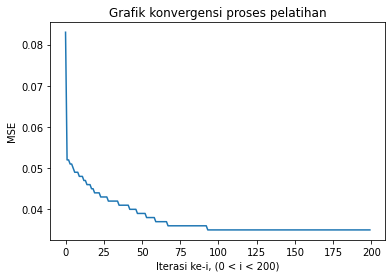

In [16]:
#menampilkan grafik konvergensi proses pelatihan
plt.figure()
plt.plot(mse[0:jumlah_iterasi,0])
plt.xlabel('Iterasi ke-i, (0 < i < '+str(jumlah_iterasi)+')')
plt.ylabel('MSE')
plt.title('Grafik konvergensi proses pelatihan')
plt.show()

In [17]:
print('')
print('========================================')
print('            PROSES PENGUJIAN            ')
print('========================================')

#menentukan data uji dan output sebenarnya
data_uji = data_normalisasi[n_datalatih:n_datalatih+n_datauji,0:8]

output_sebenarnya = data_normalisasi[n_datalatih:n_datalatih+n_datauji,8]
print("data uji : ",data_uji)
print("output sebenarnya : ",output_sebenarnya)


            PROSES PENGUJIAN            
data uji :  [[0.545 0.182 0.623 ... 0.812 0.75  0.188]
 [0.545 0.318 0.852 ... 0.729 0.75  0.281]
 [0.636 0.318 0.792 ... 0.615 0.625 0.375]
 ...
 [0.818 0.318 0.77  ... 0.635 0.625 0.312]
 [0.818 0.273 0.755 ... 0.583 0.625 0.25 ]
 [0.818 0.364 0.805 ... 0.646 0.625 0.344]]
output sebenarnya :  [0.044 0.032 0.107 0.071 0.124 0.322 0.107 0.013 0.033 0.078 0.172 0.357
 0.272 0.018 0.003 0.001 0.014 0.012 0.175 0.016 0.149 0.155 0.011 0.117
 0.006 0.033 0.124 0.258 0.178 0.216 0.146 0.306 0.146 0.12  0.134 0.296
 0.152 0.182 0.366 0.116 0.061 0.082 0.085 0.147 0.052 0.114 0.133 0.066
 0.047 0.143 0.136 0.14  0.023 0.027 0.128 0.125 0.078 0.061 0.007 0.001
 0.01  0.042 0.1   0.009 0.064 0.041 0.059 0.206 0.182 0.17  0.071 0.016
 0.026 0.039 0.01  0.037 0.35  0.158 0.032 0.02  0.088 0.02  0.025 0.02
 0.191 0.11  0.003 0.079 0.246 0.211 0.238 0.129 0.092 0.144 0.093 0.095
 0.075 0.21  0.035 0.092 0.121 0.039 0.027 0.02  0.004 0.092 0.019 0.047
 0.04

In [18]:
# mendeklarasikan variabel-variabel yang dibutuhkan dalam pengujian
hasil_prediksi = np.zeros((n_datauji, 1))

In [19]:
for j in range(n_datauji):
    [Z,Y] = jst.PerambatanMaju(data_uji[j,:],V,W,n_hidden,n_output)
    hasil_prediksi[j,0]=Y[0,0]

In [20]:
#melakukan denormalisasi hasil prediksi dan data sebenarnya
minprecipMM = min(data[:,9])
maksprecipMM = max(data[:,9])

In [21]:
hasilprediksi_denormalisasi = np.zeros((n_datauji,1))
outputsebenarnya_denormalisasi = np.zeros((n_datauji,1))

In [22]:
for i in range(n_datauji):
    #print("hasil_prediksi[i,0] : ",hasil_prediksi[i,0])
    hasilprediksi_denormalisasi[i,0]=jst.Denormalisasi(hasil_prediksi[i,0],
                                                       minprecipMM,maksprecipMM)
    outputsebenarnya_denormalisasi[i,0]=jst.Denormalisasi(output_sebenarnya[i],
                                                          minprecipMM,maksprecipMM)

In [23]:
temp = data[:,1]
windspeed = data[:,2]
winddirDegree = data[:,3]
humidity = data[:,4]
pressure = data[:,5]
cloudcover = data[:,6]
DewPoint = data[:,7]
WindGust = data[:,8]
precipMM = data[:,9]


In [24]:
rata2akurasi=0
#menampilkan hasil prediksi
print("Data ke- \t temp \t windspeed \t winddirDegree \t humidity \t pressure \t cloudcover \t DewPoint \t WindGust \t Output JST \t Output Sebenarnya \t Eror")
for i in range(n_datauji):
    hasiljst=hasilprediksi_denormalisasi[i,0]
    datasebenarnya=outputsebenarnya_denormalisasi[i,0]
    erorhasil=abs(hasiljst-datasebenarnya)

    a=0

    if(hasiljst>datasebenarnya):
        a=hasiljst
    else:
        a=datasebenarnya

    if erorhasil==a:
        akurasi = 100
    else:
        akurasi=round(100-(erorhasil/a*100),2)
    
    rata2akurasi+=akurasi
    
    print((i+1),"\t\t",data_uji[i,0],"\t",data_uji[i,1],"\t\t",data_uji[i,2],
          "\t\t",data_uji[i,3],"\t\t",data_uji[i,4],"\t\t",data_uji[i,5],"\t\t",data_uji[i,6],"\t\t",data_uji[i,7],"\t\t",hasilprediksi_denormalisasi[i,0],"\t\t",datasebenarnya,
          "\t\t\t",erorhasil)

rata2akurasi=round(rata2akurasi/n_datauji,3)
print("akurasi = ",rata2akurasi)

Data ke- 	 temp 	 windspeed 	 winddirDegree 	 humidity 	 pressure 	 cloudcover 	 DewPoint 	 WindGust 	 Output JST 	 Output Sebenarnya 	 Eror
1 		 0.545 	 0.182 		 0.623 		 0.567 		 0.364 		 0.812 		 0.75 		 0.188 		 11.0 		 7.0 			 4.0
2 		 0.545 	 0.318 		 0.852 		 0.567 		 0.364 		 0.729 		 0.75 		 0.281 		 6.0 		 5.0 			 1.0
3 		 0.636 	 0.318 		 0.792 		 0.5 		 0.364 		 0.615 		 0.625 		 0.375 		 12.0 		 17.0 			 5.0
4 		 0.545 	 0.318 		 0.814 		 0.433 		 0.364 		 0.771 		 0.625 		 0.375 		 10.0 		 11.0 			 1.0
5 		 0.727 	 0.182 		 0.717 		 0.433 		 0.273 		 0.677 		 0.75 		 0.188 		 7.0 		 20.0 			 13.0
6 		 0.727 	 0.136 		 0.299 		 0.6 		 0.273 		 0.698 		 0.75 		 0.188 		 24.0 		 51.0 			 27.0
7 		 0.727 	 0.136 		 0.582 		 0.4 		 0.273 		 0.792 		 0.75 		 0.125 		 6.0 		 17.0 			 11.0
8 		 0.636 	 0.136 		 0.456 		 0.5 		 0.273 		 0.5 		 0.75 		 0.156 		 9.0 		 2.0 			 7.0
9 		 0.636 	 0.227 		 0.774 		 0.433 		 0.273 		 0.625 		 0.625 		 0.188 		 4.0 		 5.0 			 1.0
10 		 0.

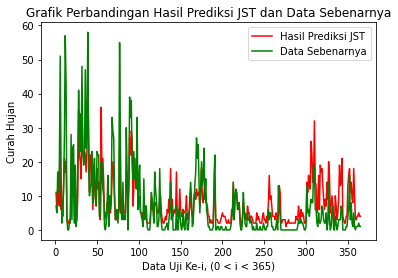

In [25]:
#menampilkan grafik konvergensi proses pelatihan
y1 = hasilprediksi_denormalisasi
y2 = outputsebenarnya_denormalisasi
x_tmp = list(range(1,n_datauji+1))
x = np.array([x_tmp]).transpose()

plt.figure()
plt.plot(x,y1,'r',x,y2,'g')
plt.xlabel('Data Uji Ke-i, (0 < i < '+str(n_datauji)+')')
plt.ylabel('Curah Hujan')
plt.title('Grafik Perbandingan Hasil Prediksi JST dan Data Sebenarnya')
plt.legend(('Hasil Prediksi JST', 'Data Sebenarnya'),loc='upper right')
plt.show()